In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

TypeError: ignored

برای این سوال از ۲ مقاله و تغییراتی که خودم دادم استفاده شده
لینک مقاله اول:https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/

لینک مقاله دوم:https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a


 اما با تعداد لایه های کمترvggاین مدل برگرفته شده است از 


# New Section

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [ ]:
#  میکنیمscaleابتدا دیتا را
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))
#   کردن استفاده میکنیمencodeبرای onehotسپس چون خروجی دیتا کتگوریکال است  از
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [ ]:
# تقسیم میکنیمtrainX و dev سپس دیتا را به دو قسمت 
from sklearn.model_selection import train_test_split
trainX, devX,trainY,devY = train_test_split(trainX,trainY, test_size=0.2, random_state=42)

In [ ]:
def create_model(activation_type,dropout):
  chanDim = 1
  model = Sequential()
  if dropout == 1:
    # استفاده میکنیم تا ورودی و خروجی هم بعد باشد same از پدینگ 
    model.add(Conv2D(32, (3, 3), padding="same",input_shape=(28, 28, 1)))
    model.add(Activation(activation_type))
    #  برای این است که اگر اولین ورودی ارتفاع باشد ۱ و اگر اولین ورودی کانال باشد -۱axisاین
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32,(3,3),padding="same"))
    model.add(Activation(activation_type))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64,(3, 3), padding="same"))
    model.add(Activation(activation_type))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation(activation_type))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(activation_type))
		#چون فلت شده دیگه محور لازم نیست مشخص بشه
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation("softmax"))
    return model
  else:
    model.add(Conv2D(32, (3, 3), padding="same",
      input_shape=(28,28,1)))
    model.add(Activation(activation_type))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(Activation(activation_type))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation(activation_type))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation(activation_type))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(activation_type))
    model.add(BatchNormalization())
    model.add(Dense(10))
    model.add(Activation("softmax"))
    return model

In [ ]:
def final_model(activation_type,dropout,num_epoch,batch_size):
  model = create_model(activation_type,dropout)
  model.compile(loss="categorical_crossentropy", optimizer='adam',
	  metrics=["accuracy"])
  final = model.fit(x=trainX, y=trainY,
	  validation_data=(devX, devY),
	  batch_size=batch_size, epochs=num_epoch)
  N = num_epoch
  plt.style.use("ggplot") 
  plt.figure()
  plt.plot(np.arange(0, N), final.history["loss"], label="train_loss")
  plt.plot(np.arange(0, N), final.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, N), final.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, N), final.history["val_accuracy"], label="val_acc")
  if dropout ==1:
    plt.title("Training Loss and Accuracy with dropout and activation {a} ".format(a =activation_type))
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig("plot.png")
  else:
    plt.title("Training Loss and Accuracy without dropout and activation {a} ".format(a =activation_type))
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig("plot.png")
  return final    

Epoch 1/5
1500/1500 [==============================] - 332s 221ms/step - loss: 0.6992 - accuracy: 0.7686 - val_loss: 0.3544 - val_accuracy: 0.8747
Epoch 2/5
1500/1500 [==============================] - 330s 220ms/step - loss: 0.3471 - accuracy: 0.8765 - val_loss: 0.2766 - val_accuracy: 0.8996
Epoch 3/5
1500/1500 [==============================] - 330s 220ms/step - loss: 0.2964 - accuracy: 0.8945 - val_loss: 0.2422 - val_accuracy: 0.9124
Epoch 4/5
1500/1500 [==============================] - 330s 220ms/step - loss: 0.2658 - accuracy: 0.9034 - val_loss: 0.2513 - val_accuracy: 0.9110
Epoch 5/5
1500/1500 [==============================] - 330s 220ms/step - loss: 0.2501 - accuracy: 0.9097 - val_loss: 0.2114 - val_accuracy: 0.9247


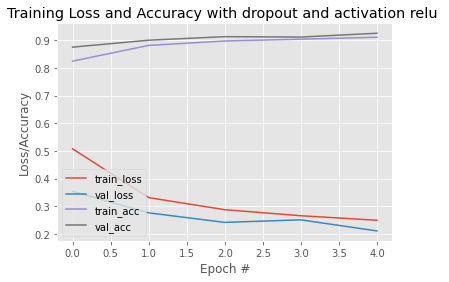

In [ ]:
model = final_model('relu',1,5,32)

In [ ]:
score = model.evaluate(testX,testY)

313/313 [==============================] - 17s 54ms/step - loss: 0.2300 - accuracy: 0.9166


Epoch 1/5
1500/1500 [==============================] - 326s 217ms/step - loss: 0.5063 - accuracy: 0.8240 - val_loss: 0.3660 - val_accuracy: 0.8754
Epoch 2/5
1500/1500 [==============================] - 325s 217ms/step - loss: 0.2702 - accuracy: 0.9009 - val_loss: 0.2587 - val_accuracy: 0.9090
Epoch 3/5
1500/1500 [==============================] - 323s 215ms/step - loss: 0.2223 - accuracy: 0.9203 - val_loss: 0.2252 - val_accuracy: 0.9202
Epoch 4/5
1500/1500 [==============================] - 324s 216ms/step - loss: 0.1826 - accuracy: 0.9329 - val_loss: 0.2365 - val_accuracy: 0.9187
Epoch 5/5
313/313 [==============================] - 18s 55ms/step - loss: 0.2403 - accuracy: 0.9172


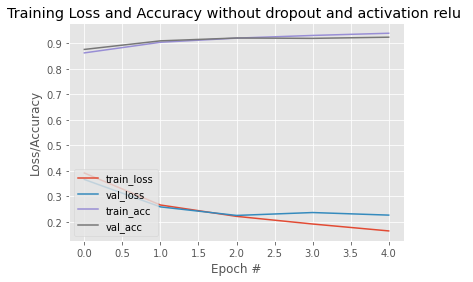

In [ ]:
model = final_model('relu',0,5,32)


In [ ]:
score = model.evaluate(testX,testY)

313/313 [==============================] - 17s 54ms/step - loss: 0.2403 - accuracy: 0.9172


Epoch 1/5
1500/1500 [==============================] - 329s 219ms/step - loss: 0.6886 - accuracy: 0.7666 - val_loss: 0.3861 - val_accuracy: 0.8684
Epoch 2/5
1500/1500 [==============================] - 329s 219ms/step - loss: 0.3916 - accuracy: 0.8604 - val_loss: 0.3273 - val_accuracy: 0.8805
Epoch 3/5
1500/1500 [==============================] - 329s 219ms/step - loss: 0.3593 - accuracy: 0.8724 - val_loss: 0.2743 - val_accuracy: 0.8975
Epoch 4/5
1500/1500 [==============================] - 329s 220ms/step - loss: 0.3290 - accuracy: 0.8818 - val_loss: 0.2651 - val_accuracy: 0.9023
Epoch 5/5
313/313 [==============================] - 18s 56ms/step - loss: 0.2766 - accuracy: 0.9004
[0.27664950489997864, 0.9003999829292297]


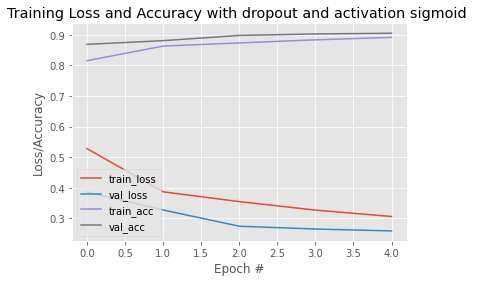

In [ ]:
model = final_model('sigmoid',1,5,32)
score = model.evaluate(testX,testY)
print(score)

Epoch 1/5
1500/1500 [==============================] - 328s 218ms/step - loss: 0.5281 - accuracy: 0.8210 - val_loss: 0.3999 - val_accuracy: 0.8626
Epoch 2/5
1500/1500 [==============================] - 326s 218ms/step - loss: 0.3141 - accuracy: 0.8881 - val_loss: 0.2878 - val_accuracy: 0.8982
Epoch 3/5
1500/1500 [==============================] - 328s 219ms/step - loss: 0.2572 - accuracy: 0.9076 - val_loss: 0.2968 - val_accuracy: 0.8949
Epoch 4/5
1500/1500 [==============================] - 327s 218ms/step - loss: 0.2290 - accuracy: 0.9169 - val_loss: 0.2892 - val_accuracy: 0.8974
Epoch 5/5
313/313 [==============================] - 18s 56ms/step - loss: 0.2447 - accuracy: 0.9128


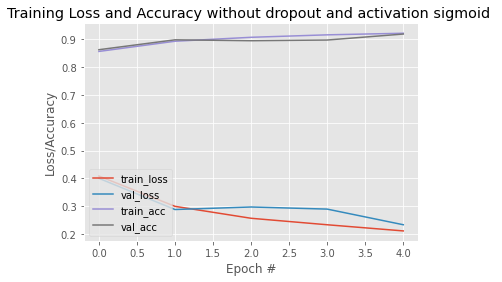

In [ ]:
model = final_model('sigmoid',0,5,32)
score = model.evaluate(testX,testY)

در نهایت بهترین مدل که رلو بدون دراپ اوت است را برای تست امتحان میکنیم

Epoch 1/5
1500/1500 [==============================] - 328s 218ms/step - loss: 0.5060 - accuracy: 0.8249 - val_loss: 0.3832 - val_accuracy: 0.8604
Epoch 2/5
1500/1500 [==============================] - 327s 218ms/step - loss: 0.2640 - accuracy: 0.9046 - val_loss: 0.2522 - val_accuracy: 0.9094
Epoch 3/5
1500/1500 [==============================] - 327s 218ms/step - loss: 0.2209 - accuracy: 0.9194 - val_loss: 0.2504 - val_accuracy: 0.9117
Epoch 4/5
1500/1500 [==============================] - 326s 218ms/step - loss: 0.1779 - accuracy: 0.9357 - val_loss: 0.2485 - val_accuracy: 0.9096
Epoch 5/5
1500/1500 [==============================] - 324s 216ms/step - loss: 0.1529 - accuracy: 0.9441 - val_loss: 0.2323 - val_accuracy: 0.9158


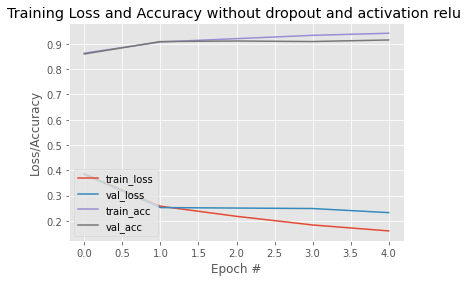

In [ ]:
best_model = final_model('relu',0,5,32)


In [ ]:
با مقایسه نمودار های لاس برای ترین و ولیدیشن میبینیم که در حالت که دراپ اوت فعال باشد در نهایت مقدار لاس برای ترین بیشتر است از ولیدیشن که این یعنی مدل داره ریگولار میشه ولی چون تو ولیدیشن ریگولار غیر فعال است باعث میشود مقدار لاس کمتر باشد 

با مقایسه نمودار ها در حالت تابع فعال ساز رلو و تابع فعال ساز سیگموید داریم در حالت رلو کاهش لاس به صورت غیر خطی است که ینی در بعضی بچ ها بعضی نورون ها صفر شده و لاس بیشتر شده اما در حال سیگموید این مقدار در همه اپوک ها کمترو کمتر شده
